# QF 627 Programming and Computational Finance
## `Py`Day `Recess` Week

In [1]:
# Dependencies

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from numpy.random import randint, choice, shuffle, normal

from scipy.special import factorial

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Bias-Variance Trade-Off

In [3]:
def generate_synthetic_data(x, max_degree = 9):
    taylor = [(-1) ** i * x ** e / factorial(e) for i, e in enumerate(range(1, max_degree, 2)
                                                                     )
             ]
    return np.sum(taylor, axis = 0)

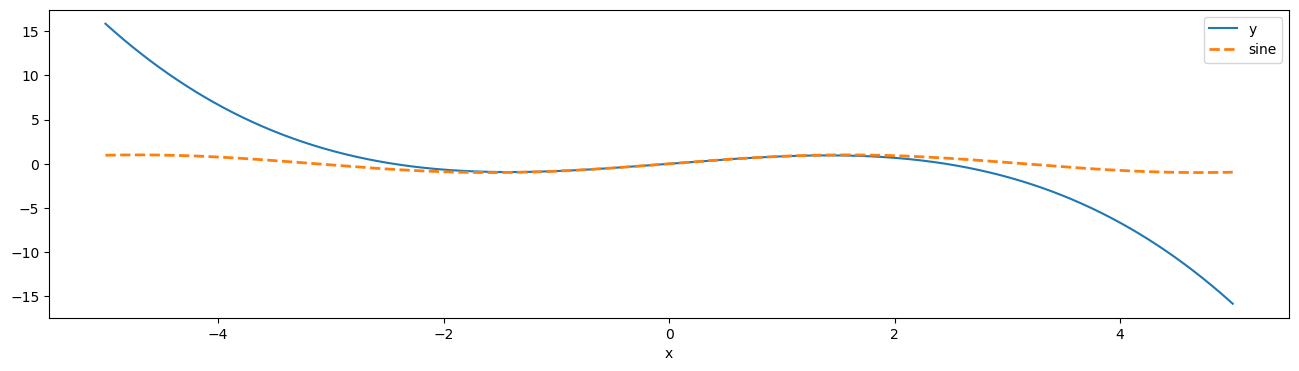

In [4]:
max_degree = 5

fig, ax = plt.subplots(figsize = [16, 4]
                      )

x = np.linspace(-5, 5, 1000)

data =\
(
    pd
    .DataFrame({"y": generate_synthetic_data(x, max_degree), "x":x}
              )
)

data \
    .plot(x = "x",
          y = "y",
          legend = False,
          ax = ax)

pd.Series(np.sin(x), index = x) \
    .plot(ax = ax, 
          ls = "--",
          lw = 2,
          label = "sine")

plt.legend();

### Underfitting vs. Overfitting

In [5]:
from collections import defaultdict

In [6]:
%whos

Variable                  Type                          Data/Info
-----------------------------------------------------------------
LinearRegression          ABCMeta                       <class 'sklearn.linear_mo<...>._base.LinearRegression'>
ax                        Axes                          Axes(0.125,0.11;0.775x0.77)
choice                    builtin_function_or_method    <built-in method choice o<...>te object at 0x107f5e740>
data                      DataFrame                                  y        x\n<...>\n[1000 rows x 2 columns]
defaultdict               type                          <class 'collections.defaultdict'>
factorial                 function                      <function factorial at 0x127394f70>
fig                       Figure                        Figure(1600x400)
generate_synthetic_data   function                      <function generate_synthetic_data at 0x168bd33a0>
max_degree                int                           5
mean_squared_error        fun

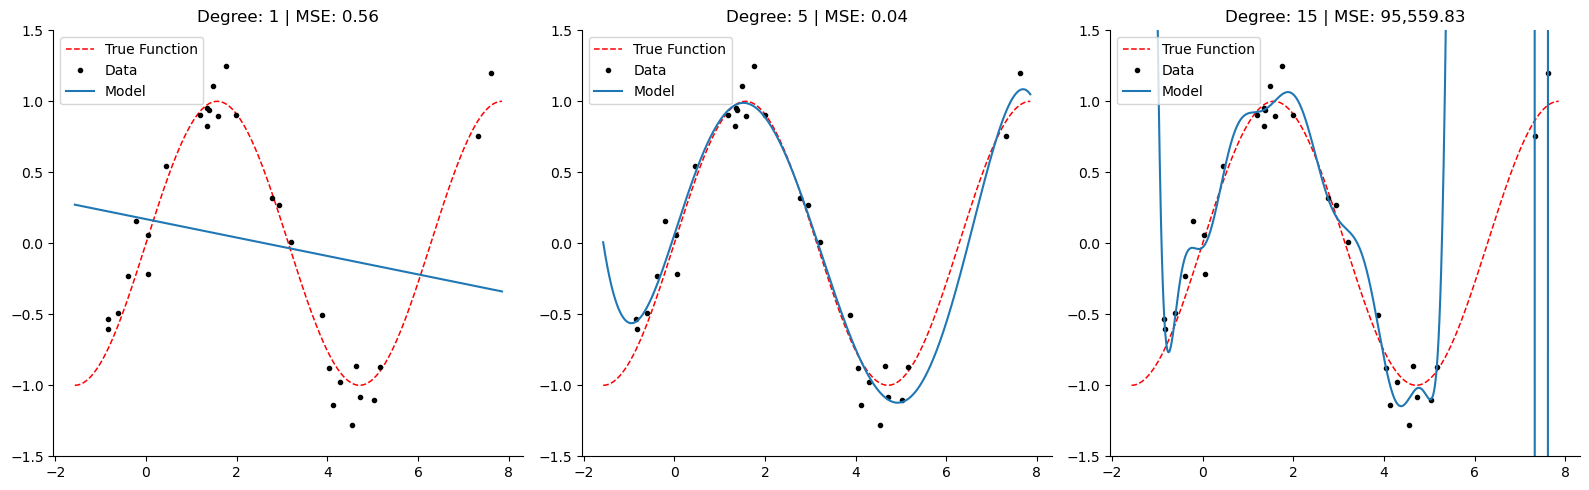

In [7]:
fig, axes = plt.subplots(ncols = 3,
                         figsize = [16, 5]
                        )

x =\
(np
 .linspace(-0.5 * np.pi, 2.5 * np.pi, 1000)
)

true_function =\
(pd
 .Series(np.sin(x), index = x)
)

noise = 0.2

n = 30

degrees = [1, 5, 15]

x_ =\
(
    np
    .random
    .choice(x,
            size = n)
)

y_ =\
    np.sin(x_)

y_ += normal(loc = 0,
             scale = np.std(y_) * noise,
             size = n)

mse = defaultdict(list)

for i, degree in enumerate(degrees):
    fit = np.poly1d(np.polyfit(x = x_, y = y_, deg = degree)
                   )

    true_function.plot(ax = axes[i],
                       label = "True Function",
                       c = "red",
                       lw = 1.1,
                       ls = "--")

    pd.Series(y_, index = x_).plot(ax = axes[i],
                                   label = "Data",
                                   style = ".",
                                   c = "k")
    
    pd.Series(fit(x), index = x).plot(label = "Model",
                                      ax = axes[i]
                                     )

    axes[i].set_ylim(-1.5, 1.5)

    mse = mean_squared_error(fit(x), np.sin(x)
                            )

    axes[i].legend()

    axes[i].set_title(f"Degree: {degree} | MSE: {mse:,.2f}")

sns.despine()
fig.tight_layout();

In [8]:
datasets = ["Train", "Test"]

X = {"Train": np.linspace(-1, 1, 1000), 
     "Test": np.linspace(1, 2, 500)
    }

models = {"Underfit": 1, "Good Fit": 5, "Overfit": 15}

sample, noise = 25, 0.01

result = []

for i in range(100):
    x_ = {d: choice(X[d], size = sample, replace = False) for d in datasets}
    y_ = {d: generate_synthetic_data(x_[d], max_degree = 5) for d in datasets}
    y_["Train"] += normal(loc = 0,
                          scale = np.std(y_["Train"]) * noise,
                          size = sample)

    trained_models =\
    {
        fit: np.poly1d(np.polyfit(x = x_["Train"], y = y_["Train"], deg = deg)
                      )
        for fit, deg in models.items()   
    }

    for fit, model in trained_models.items():
        for dataset in datasets:
            pred = model(x_[dataset]
                        )
            result \
                .append(pd
                        .DataFrame(
                            dict(x = x_[dataset],
                                 Model = fit,
                                 Data = dataset,
                                 y = pred,
                                 Error = pred - y_[dataset]
                                )
                        )
                       )

result =\
(    pd
     .concat(result)
)

### Visualize Your Model

In [9]:
%whos

Variable                  Type                          Data/Info
-----------------------------------------------------------------
LinearRegression          ABCMeta                       <class 'sklearn.linear_mo<...>._base.LinearRegression'>
X                         dict                          n=2
ax                        Axes                          Axes(0.125,0.11;0.775x0.77)
axes                      ndarray                       3: 3 elems, type `object`, 24 bytes
choice                    builtin_function_or_method    <built-in method choice o<...>te object at 0x107f5e740>
data                      DataFrame                                  y        x\n<...>\n[1000 rows x 2 columns]
dataset                   str                           Test
datasets                  list                          n=2
defaultdict               type                          <class 'collections.defaultdict'>
degree                    int                           15
degrees                   

In [10]:
y = {d: generate_synthetic_data(X[d], max_degree = 5) for d in datasets}

y["Train_Noise"] =\
(    y["Train"] + normal(loc = 0,
                         scale = np.std(y["Train"]) * noise,
                         size = len(y["Train"]
                                   )
                        )
)

colors =\
    {"Undefit": "red",
     "Good Fit": "green",
     "Overfit": "blue"
    }

test_data = result[result.Data == "Test"]

Text(0.5, 0.98, 'The Ultimate Bias-Variance Tradeoff: Ramifications of Underfitting vs. Overfitting')

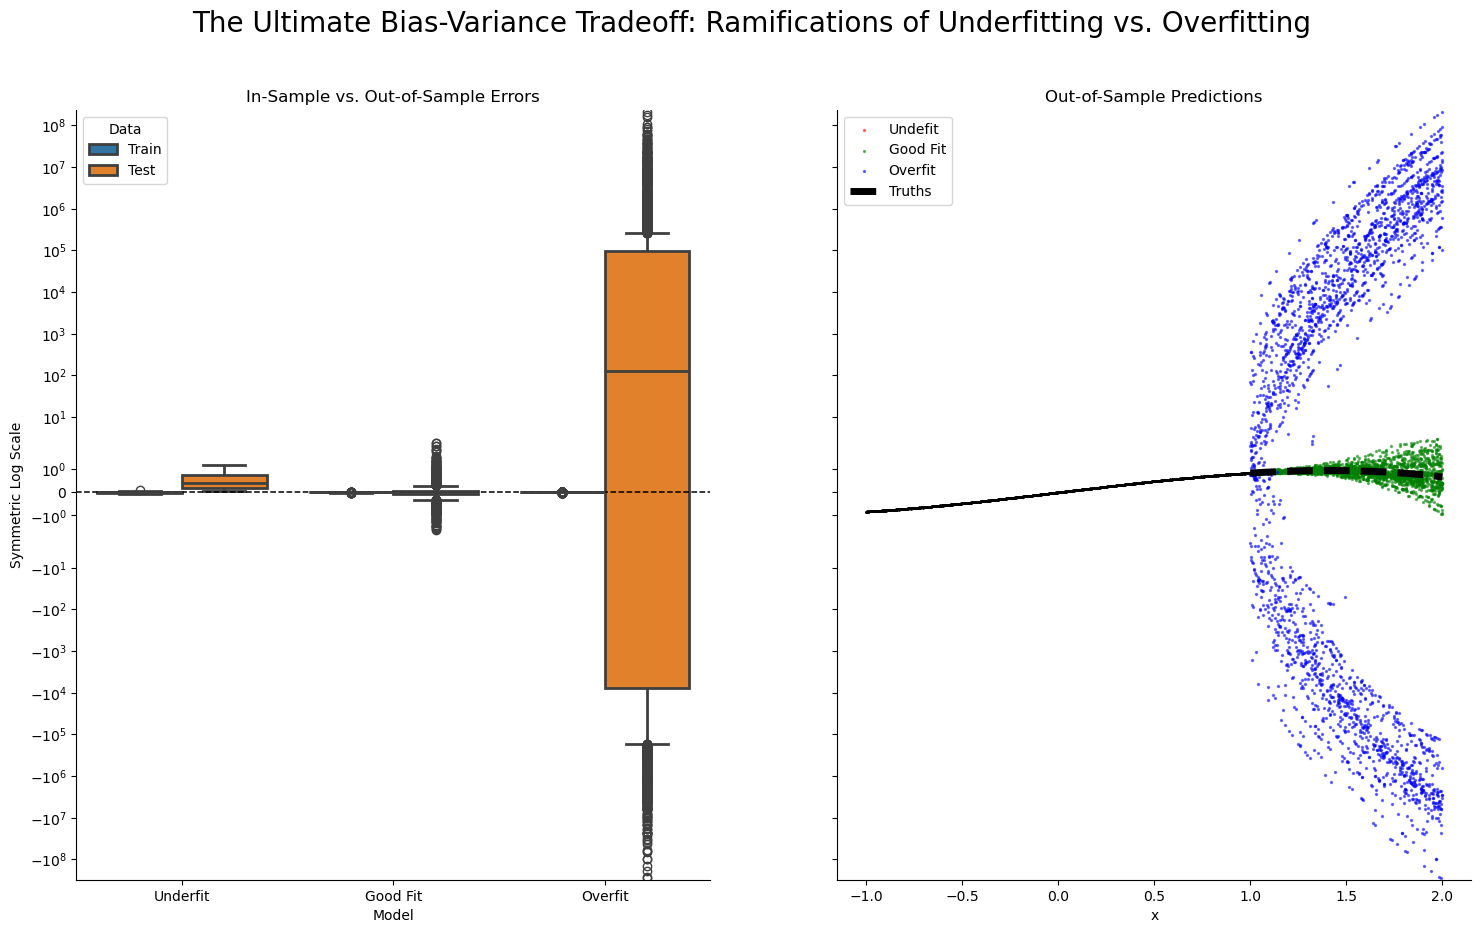

In [11]:
fig, axes =\
(    plt
     .subplots(figsize = [18, 10],
               ncols = 2,
               sharey = True)
)

sns \
    .boxplot(x = "Model",
             y = "Error",
             data = result,
             ax = axes[0],
             linewidth = 2,
             hue = "Data")

axes[0].set_title("In-Sample vs. Out-of-Sample Errors")

axes[0].axhline(0,
                ls =  "--",
                lw = 1.1,
                color = "k")

axes[0].set_ylabel("Symmetric Log Scale")

for model in colors.keys():
    (test_data[(test_data["Model"] == model)]
     .plot
     .scatter(x = "x",
              y = "y",
              ax = axes[1],
              s = 2,
              color = colors[model],
              label = model,
              alpha = 0.50)
    )

(pd.DataFrame(dict(x = X["Train"],
                   y = y["Train_Noise"]
                  )
             )
     .plot
     .scatter(x = "x",
              y = "y",
              ax = axes[1],
              c = "k",
              s = 1
             )
)

(
    pd.Series(y["Test"],
              index = X["Test"]
             )
        .plot(label = "Truths",
              ax = axes[1],
              ls = "--",
              lw = 5,
              color = "black"
             )
)

axes[0].set_yscale("symlog")
axes[1].set_title("Out-of-Sample Predictions")

axes[1].legend()

sns.despine()

# fig.tight_layout()

fig.suptitle("The Ultimate Bias-Variance Tradeoff: Ramifications of Underfitting vs. Overfitting",
             fontsize = 20)

### Time-Series (`VAR`)

### Vector Autoregressive VAR(p) Model

$$
    Y_t = A_1 Y_{t-1} + A_2 Y_{t-2} + \ldots + A_p Y_{t-p} + u_t
$$

In [12]:
# y = vector of endogeneous variables at time t

In [13]:
from statsmodels.tsa.api import VARMAX
from statsmodels.tsa.stattools import acf, adfuller, q_stat

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.preprocessing import minmax_scale

from sklearn.metrics import mean_absolute_error

from scipy.stats import probplot, moment

### Unit Root Test

In [14]:
def test_unit_root(df):
    return df.apply(lambda x: f"{pd.Series(adfuller(x)).iloc[1]:.2%}").to_frame("p-value")

### IMPORT

> Let me use VAR model for a QUANT research on fundamentals forecasts `MACRO` 

In [15]:
import pandas_datareader.data as web

In [16]:
df =\
    web \
    .DataReader(["UMCSENT", "IPGMFN"], 
                "fred",
                "1970",
                "2019-12") \
    .dropna()

# returns a time-series of monthly data

In [17]:
df.head(2)

,UMCSENT,IPGMFN
DATE,,
1972-02-01,92.8,35.8158
1972-05-01,88.6,37.3345


In [18]:
df.columns = ["sentiment", "ip"]

In [19]:
df.head(2)

,sentiment,ip
DATE,,
1972-02-01,92.8,35.8158
1972-05-01,88.6,37.3345


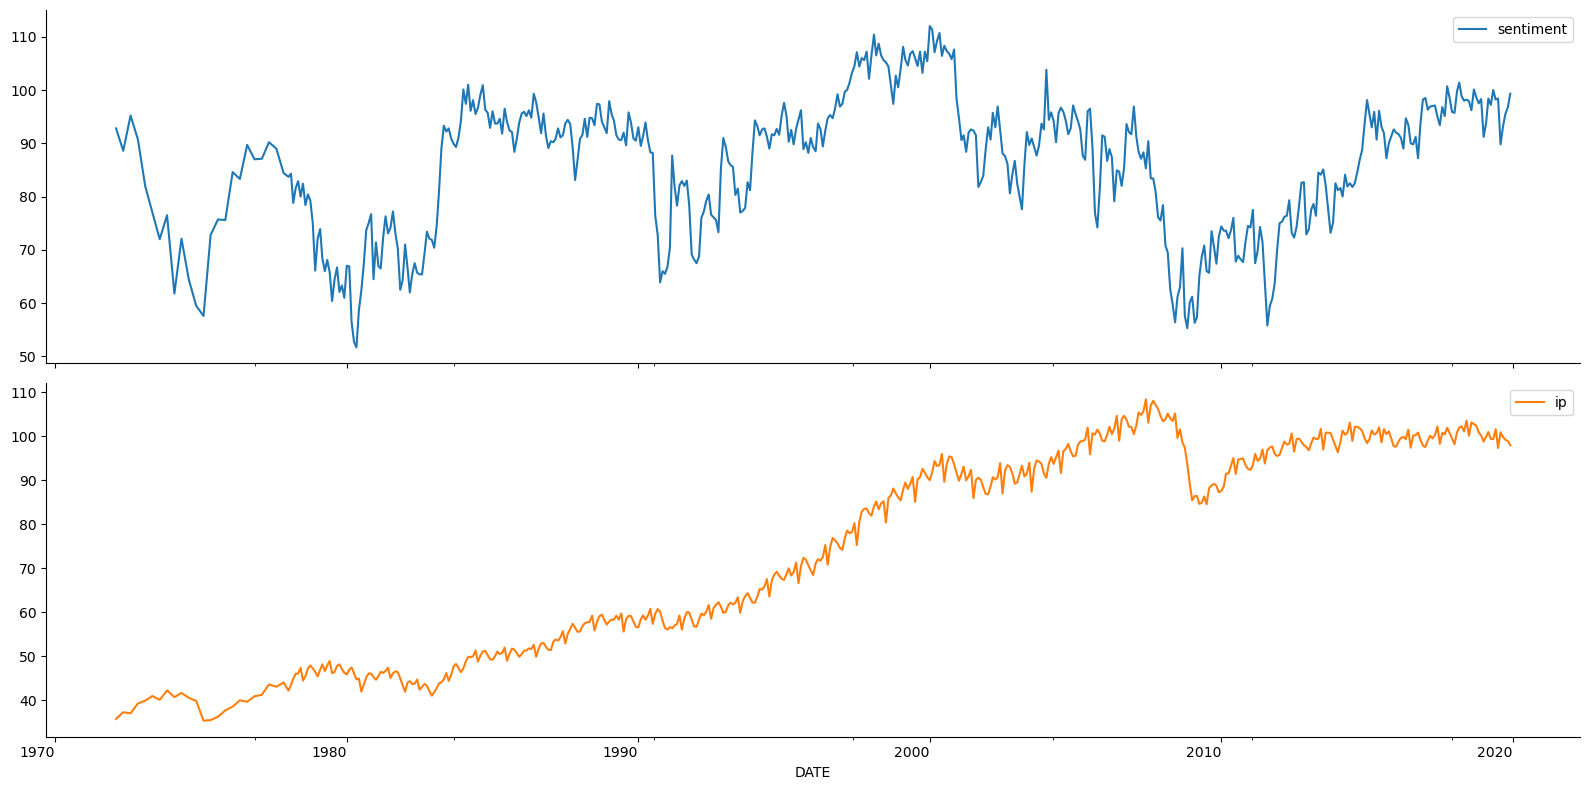

In [20]:
df.plot(subplots = True,
        figsize = [16, 8], 
        rot = 0)

sns.despine()

plt.tight_layout();

### Gift Function of `Correlogram` (a.k.a., autocorrelation plot)

In [21]:
def visualize_autocorrelation_qf627(x, 
                                    lags = None,
                                    title = None):

    lags = min(10, int(len(x) / 5)) if lags is None else lags 

    fig, axes = plt.subplots(nrows = 2, 
                             ncols = 2,
                             figsize = [16, 8]
                            )

    x.plot(ax = axes[0][0], 
           title = "Time Series")
    x.rolling(21).mean().plot(ax = axes[0][0],
                              c = "r",
                              lw = 1.1)
# reminder: from statsmodels.tsa.stattools import acf
    q_p = np.max(q_stat(acf(x, nlags = lags), len(x)
                       )[1]
                )
    stats = f"Q-Stat: {np.max(q_p):>8.2f}\nADF: {adfuller(x)[1]:11.2f}"

    axes[0][0].text(x = 0.01,
                    y = 0.90,
                    s = stats,
                    transform = axes[0][0].transAxes)
# reminder: from scipy.stats import probplot
    probplot(x, plot = axes[0][1]
            )
# reminder: from scipy.stats import moment
    mean, var, skew, kurtosis = moment(x, moment = [1, 2, 3, 4]
                                      )
    s = f"Mean: {mean:>12.2f}\nSD: {np.sqrt(var):>16.2f}\nSkew: {skew:12.2f}\nKurtosis:{kurtosis:9.2f}"

    axes[0][1].text(x = 0.10,
                    y = 0.80,
                    s = s,
                    transform = axes[0][1].transAxes)

    plot_acf(x = x,
             lags = lags,
             zero = False,
             ax = axes[1][0]
            )
    
    plot_pacf(x= x,
              lags = lags,
              zero = False,
             ax = axes[1][1]
             )

    fig.suptitle(title,
                 fontsize = 16)

    sns.despine()

    fig.tight_layout()

# fig.subplots_adjust()

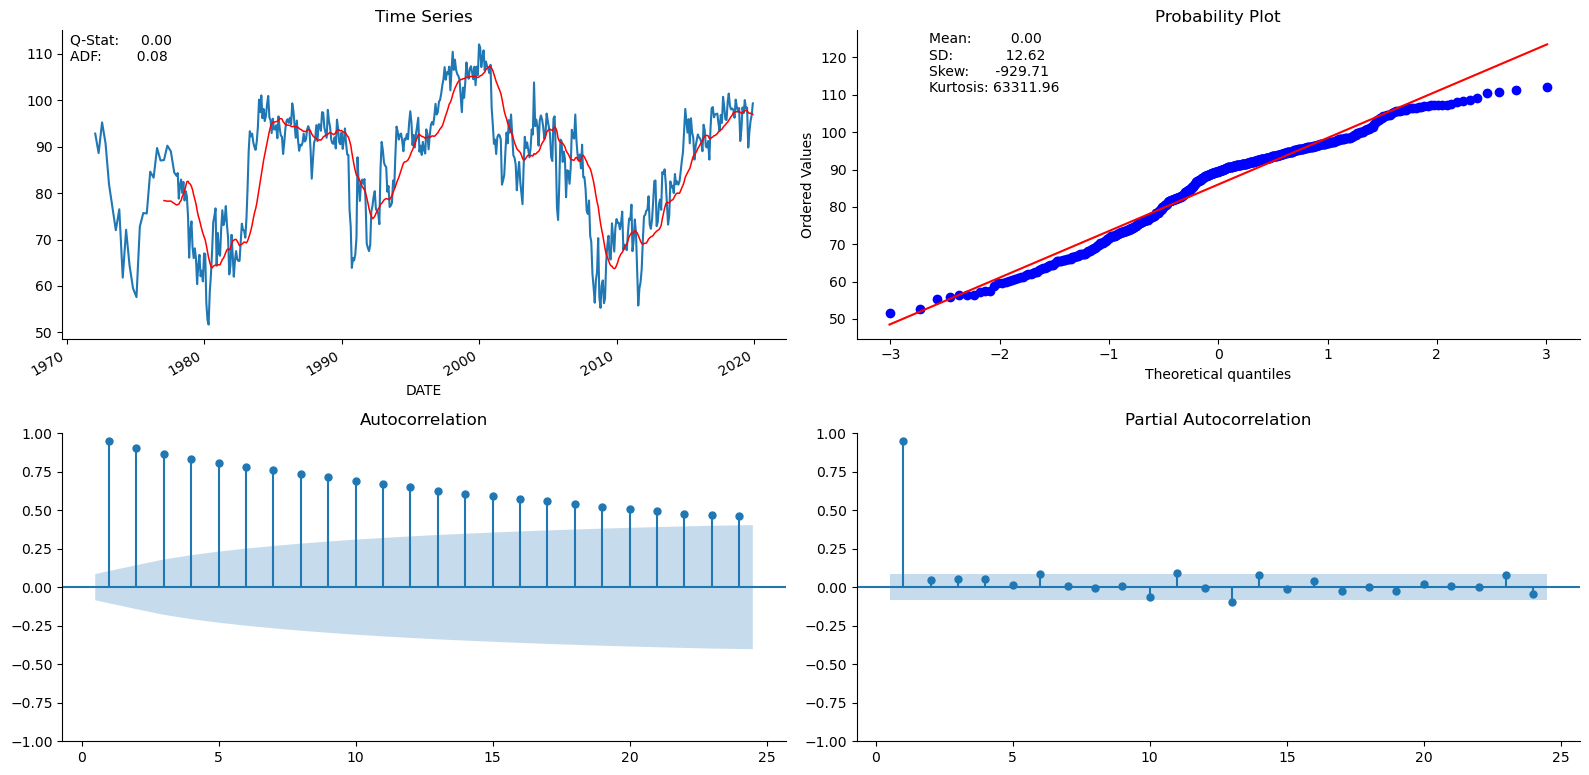

In [22]:
visualize_autocorrelation_qf627(df.sentiment,
                                lags = 24)

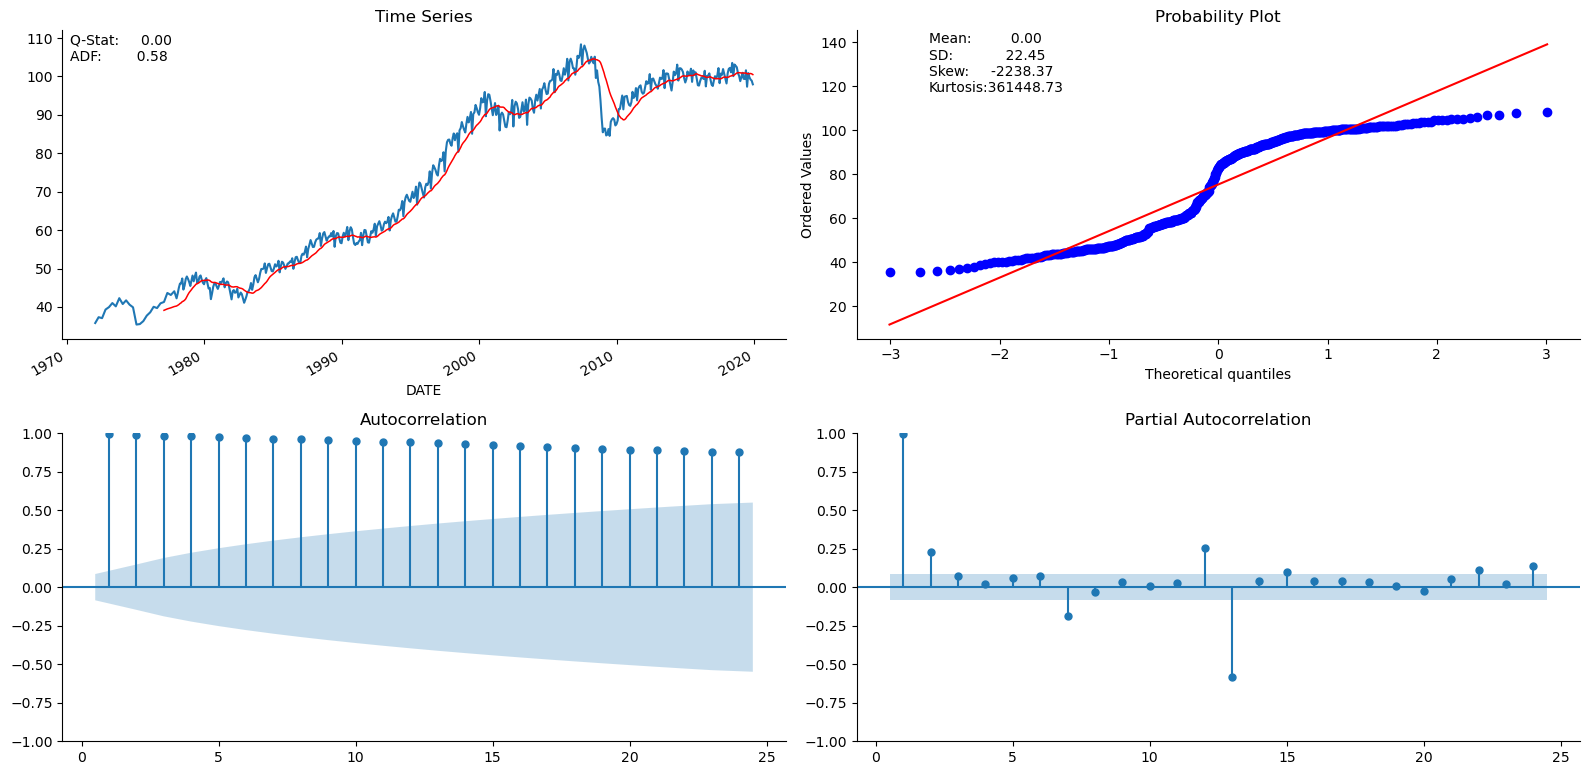

In [23]:
visualize_autocorrelation_qf627(df.ip,
                                lags = 24)

In [24]:
# IP: Industrial Production

In [25]:
df_stationary =\
    pd \
    .DataFrame({"ip": np.log(df.ip).diff(12),
                "sentiment": df.sentiment.diff(12)}
              ) \
    .dropna()

In [26]:
df_stationary.head(10)

,ip,sentiment
DATE,,
1975-02-01,-0.011146,-35.2
1975-05-01,-0.049186,-15.8
1975-08-01,-0.021260,-19.5
1975-11-01,-0.041099,-15.1
1976-02-01,-0.034551,2.7
1976-05-01,-0.024006,6.3
1976-08-01,-0.011146,17.7
1976-11-01,-0.032095,10.5
1977-02-01,0.013135,25.3


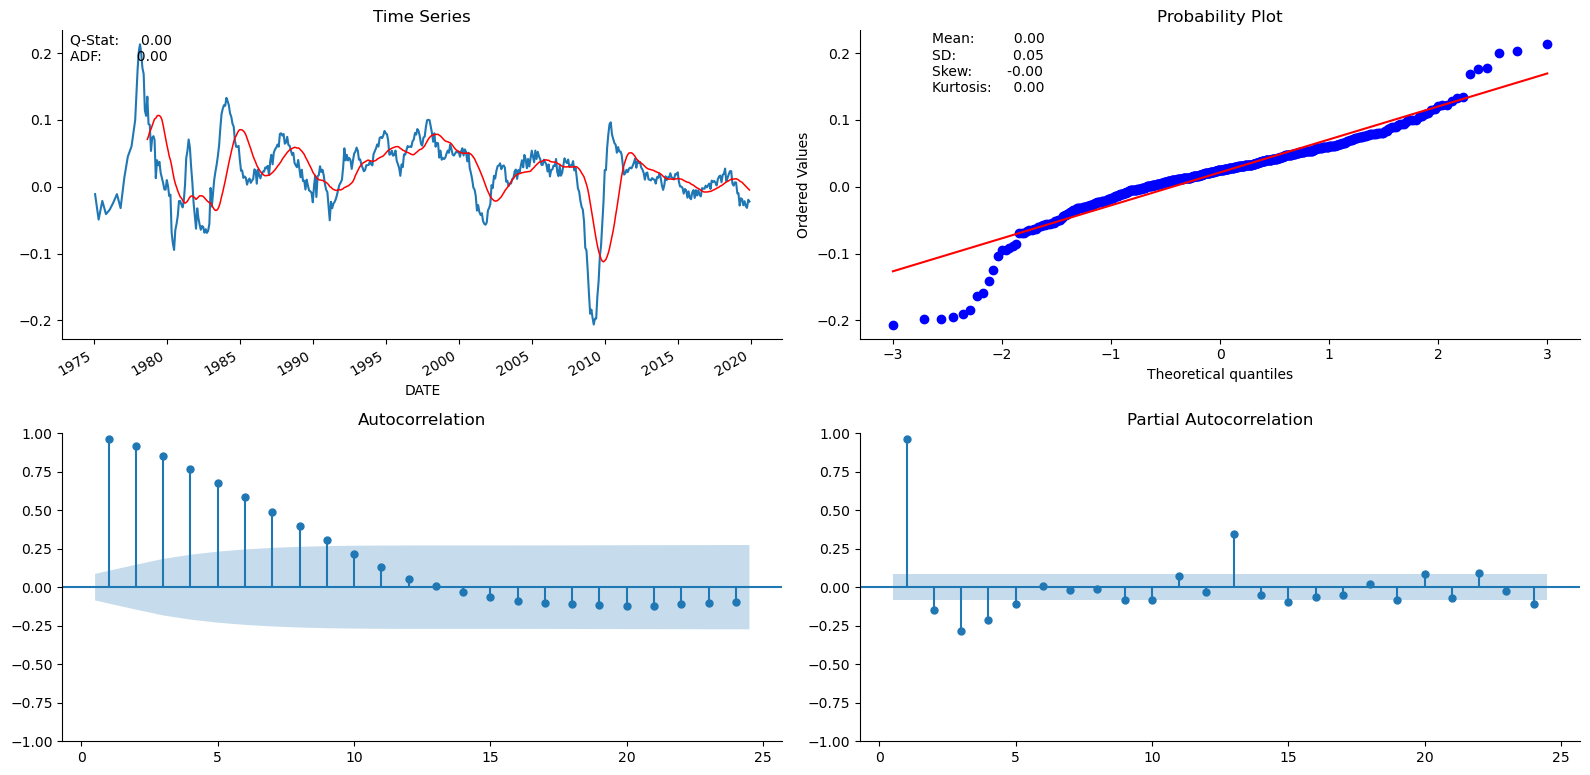

In [27]:
visualize_autocorrelation_qf627(df_stationary.ip, 
                                lags = 24)

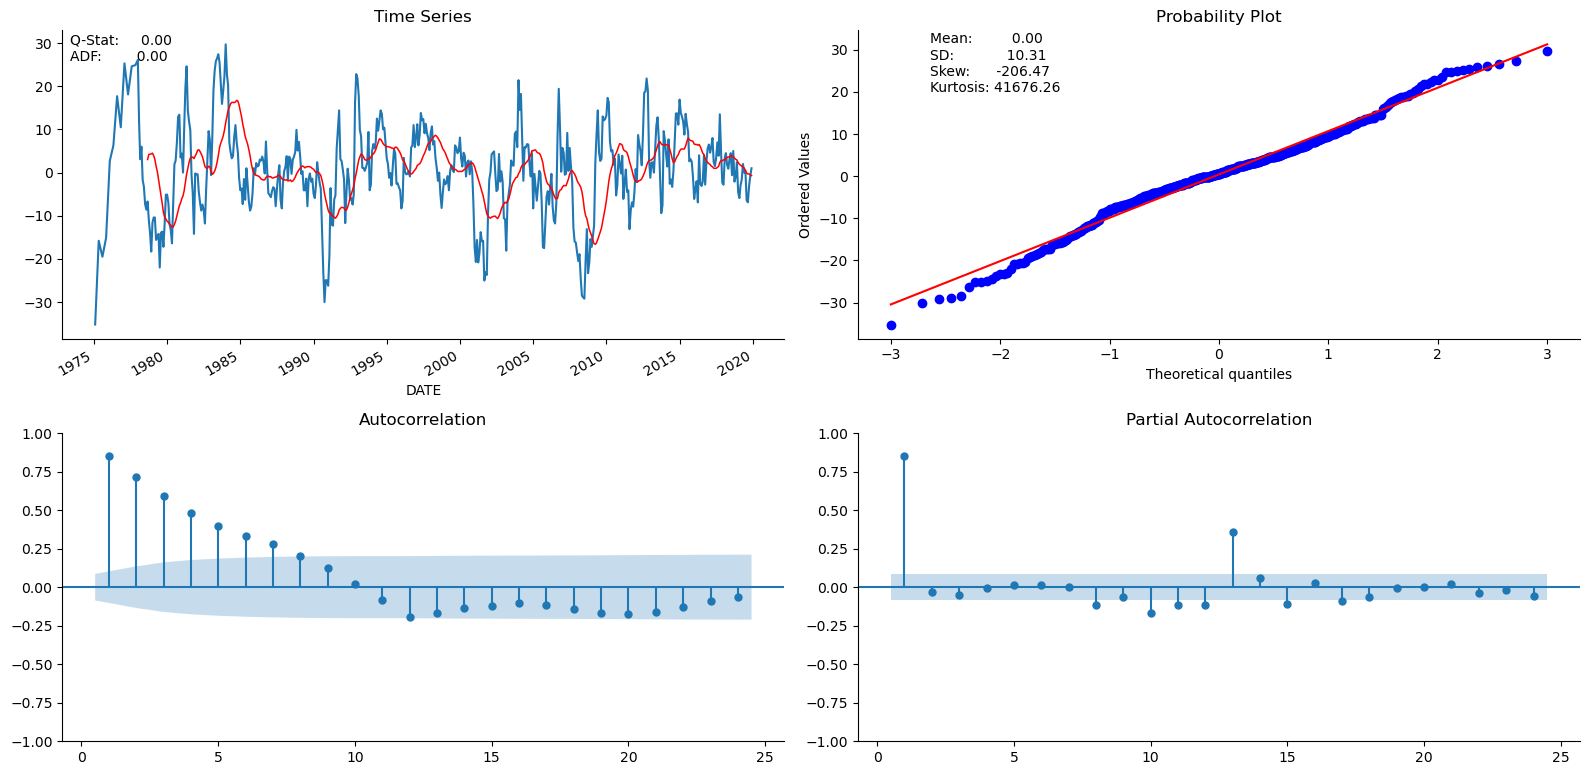

In [28]:
visualize_autocorrelation_qf627(df_stationary.sentiment, 
                                lags = 24)

### Run Unit-Root Test

In [29]:
%whos

Variable                          Type                          Data/Info
-------------------------------------------------------------------------
LinearRegression                  ABCMeta                       <class 'sklearn.linear_mo<...>._base.LinearRegression'>
VARMAX                            type                          <class 'statsmodels.tsa.s<...>tatespace.varmax.VARMAX'>
X                                 dict                          n=2
acf                               function                      <function acf at 0x1693b4a60>
adfuller                          function                      <function adfuller at 0x1693b4820>
ax                                Axes                          Axes(0.125,0.11;0.775x0.77)
axes                              ndarray                       2: 2 elems, type `object`, 16 bytes
choice                            builtin_function_or_method    <built-in method choice o<...>te object at 0x107f5e740>
colors                            dict 

In [30]:
test_unit_root(df_stationary)

,p-value
ip,0.02%
sentiment,0.00%


array([<Axes: title={'center': 'Industrial Production'}, xlabel='DATE'>,
       <Axes: title={'center': 'Consumer Sentiment'}, xlabel='DATE'>],
      dtype=object)

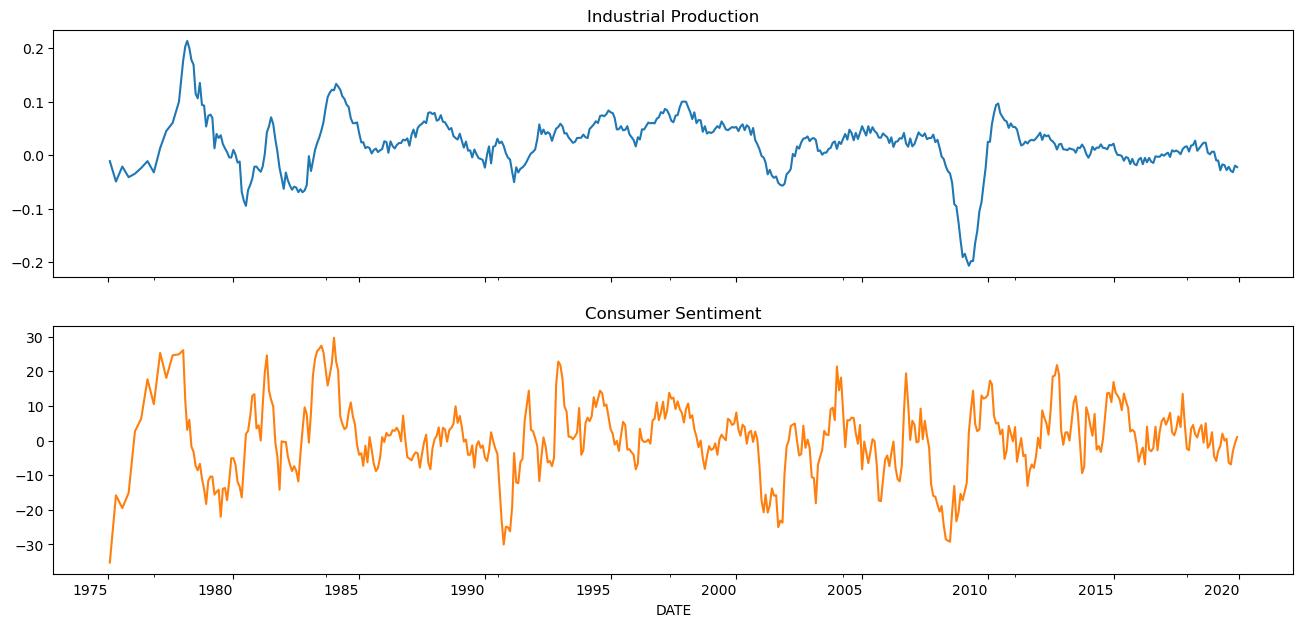

In [31]:
df_stationary \
    .plot(subplots = True,
          title = ["Industrial Production",
                   "Consumer Sentiment"],
          legend = False,
          rot = 0,
          figsize = [16, 8]
         )

### Run VAR Model

In [32]:
df_stationary =\
    df_stationary \
    .apply(minmax_scale)

In [33]:
model =\
    VARMAX(df_stationary.loc[ :"2017"],
           order = (1, 1),
           trend = "c") \
    .fit(maxiter = 1000)

/Users/sroh/miniforge3/envs/rohenv/lib/python3.9/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/Users/sroh/miniforge3/envs/rohenv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.16746D+00    |proj g|=  7.20262D-01

At iterate    5    f= -3.16754D+00    |proj g|=  1.09160D-01

At iterate   10    f= -3.16764D+00    |proj g|=  1.97640D-01

At iterate   15    f= -3.16785D+00    |proj g|=  5.83572D-02

At iterate   20    f= -3.16790D+00    |proj g|=  1.84545D-01

At iterate   25    f= -3.16796D+00    |proj g|=  1.71490D-01

At iterate   30    f= -3.16811D+00    |proj g|=  5.99538D-01

At iterate   35    f= -3.16821D+00    |proj g|=  7.27024D-03

At iterate   40    f= -3.16822D+00    |proj g|=  2.24294D-02

At iterate   45    f= -3.16828D+00    |proj g|=  4.38336D-02

At iterate   50    f= -3.16833D+00    |proj g|=  8.24995D-03

At iterate   55    f= -3.16834D+00    |proj g|=  1.91808D-01

At iterate   60    f= -3.16845D+00    |proj g|=  1.49414D-01

At iterate   65    f= -3.1


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [34]:
model \
    .summary()

Dep. Variable:,"['ip', 'sentiment']",No. Observations:,492
Model:,"VARMA(1,1)",Log Likelihood,1558.952
,+ intercept,AIC,-3091.904
Date:,"Mon, 09 Oct 2023",BIC,-3037.323
Time:,00:22:09,HQIC,-3070.472
Sample:,0,,
,- 492,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"0.24, 0.31",Jarque-Bera (JB):,"151.20, 16.48"
Prob(Q):,"0.62, 0.58",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"0.46, 1.02",Skew:,"0.18, 0.20"


In [35]:
dir(model)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_cache',
 '_cov_approx_centered',
 '_cov_approx_complex_step',
 '_cov_params_approx',
 '_cov_params_oim',
 '_cov_params_opg',
 '_cov_params_robust_approx',
 '_cov_params_robust_oim',
 '_data_attr',
 '_data_attr_model',
 '_data_in_cache',
 '_fixed_params',
 '_fixed_params_index',
 '_free_params_index',
 '_get_robustcov_results',
 '_has_fixed_params',
 '_news_previous_data',
 '_news_previous_results',
 '_news_updated_data',
 '_news_updated_results',
 '_rank',
 '_set_final_predicted_state',
 '_states',
 '_use_t',
 'aic',
 'aicc',
 'append',
 'apply',
 'bic',
 'bse',
 'coefficient_matrices_var',
 'coefficient_matr

Text(0.5, 0.98, 'Industrial Production: Diagnostics')

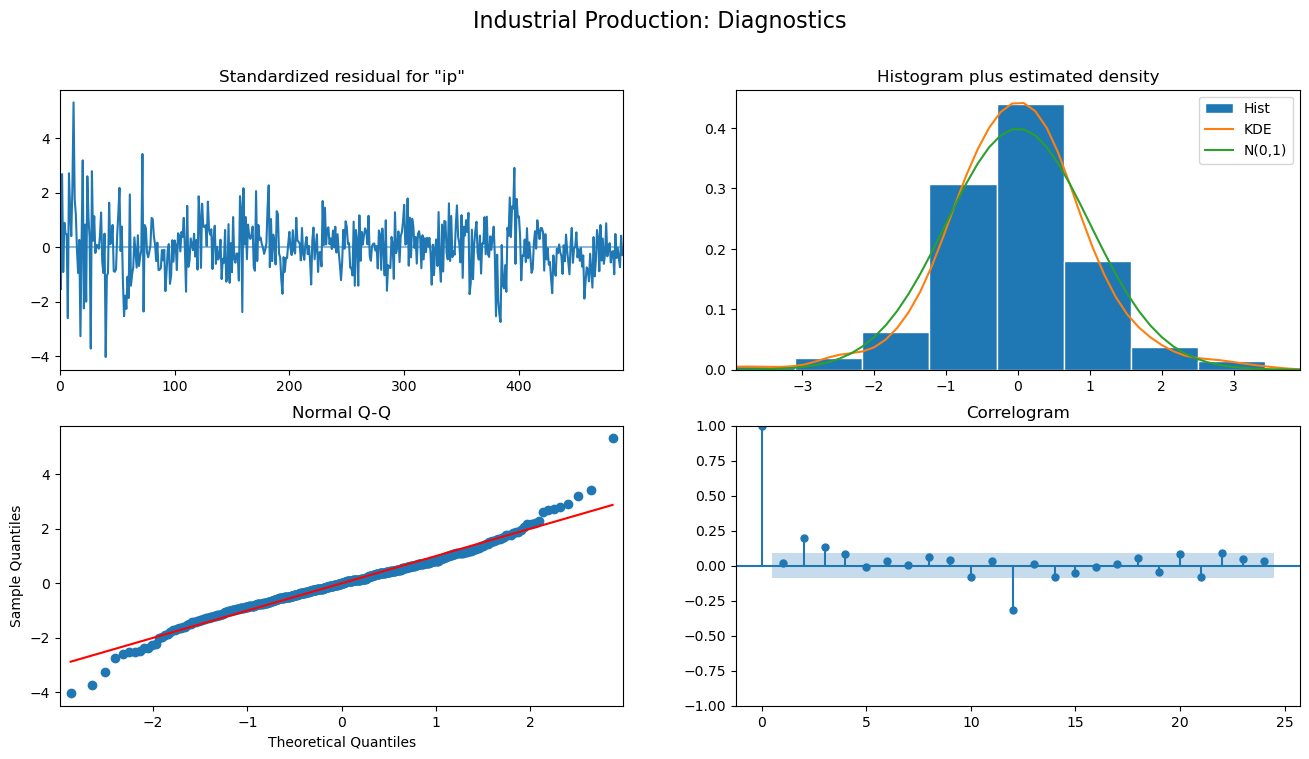

In [36]:
model.plot_diagnostics(variable = 0,
                       figsize = [16, 8],
                       lags = 24)

plt.gcf().suptitle("Industrial Production: Diagnostics",
                   fontsize = 16)

# plt.tight_layout()
# plt.subplots_adjust()

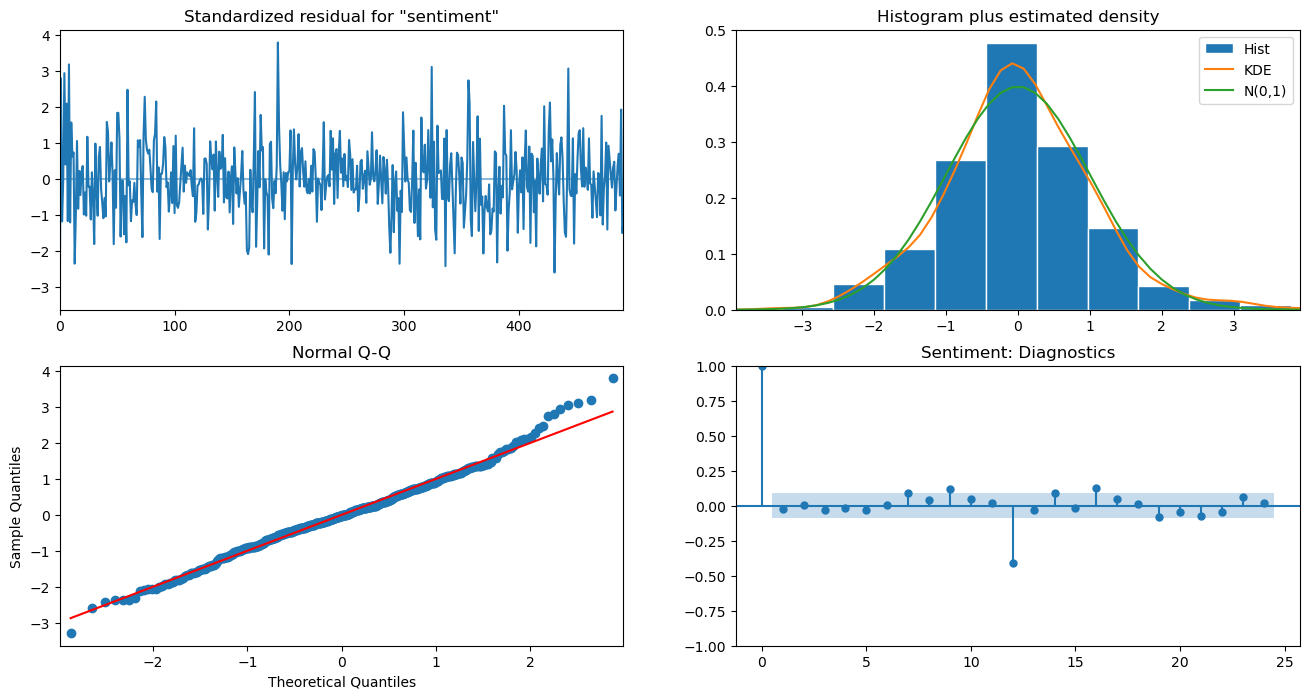

In [37]:
model.plot_diagnostics(variable = 1,
                       figsize = [16, 8],
                       lags = 24)
plt.title("Sentiment: Diagnostics");

In [38]:
# Impulse-Response

median_level_change =\
    df_stationary \
    .diff() \
    .quantile(0.50) \
    .tolist()

array([<Axes: title={'center': 'ip'}>,
       <Axes: title={'center': 'sentiment'}>], dtype=object)

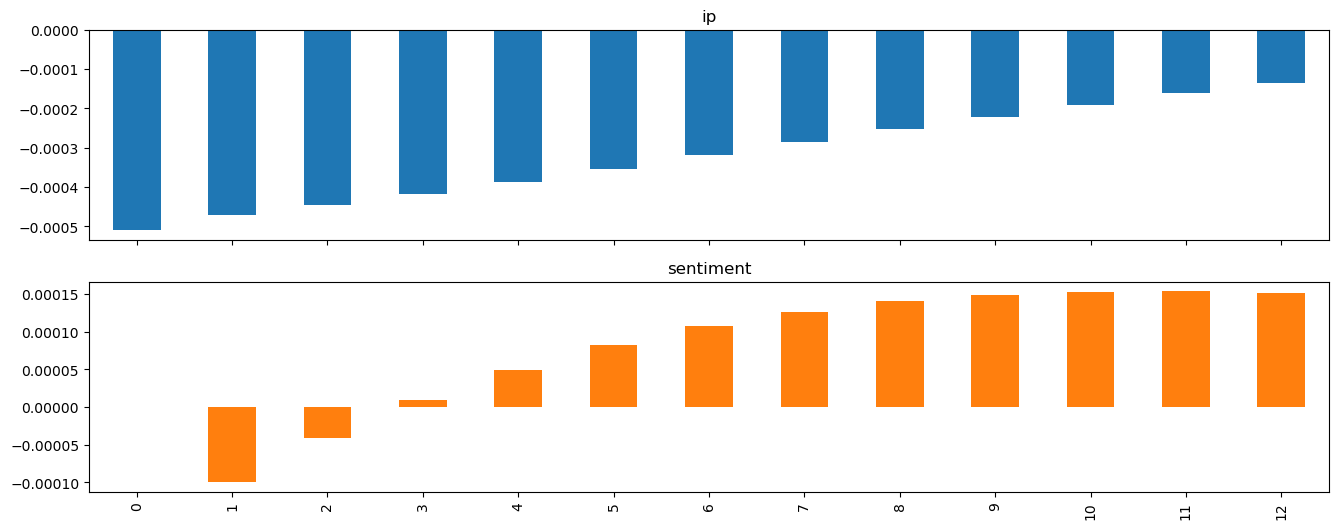

In [39]:
model \
    .impulse_responses(steps = 12,
                       impulse = median_level_change) \
    .plot \
    .bar(subplots = True,
         figsize = [16, 6],
         legend = False
        )              

### Out-of-Sample Predictions

In [40]:
n = len(df_stationary)

start = n - 24

preds =\
    model \
    .predict(start = start + 1,
             end = n)

/Users/sroh/miniforge3/envs/rohenv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [41]:
preds.index = df_stationary.index[start: ]

In [42]:
import matplotlib.transforms as mtransforms

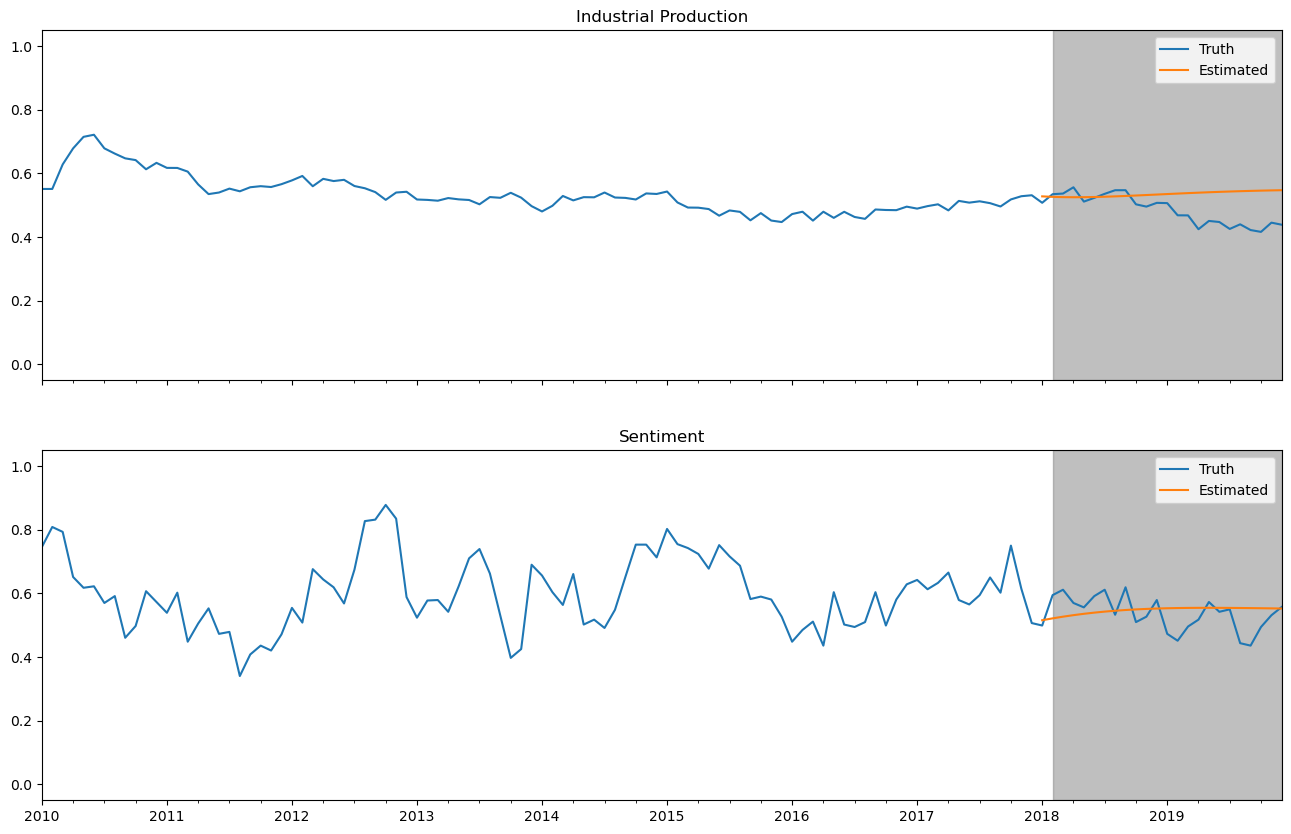

In [43]:
fig, axes =\
    plt \
    .subplots(sharex = True,
              nrows = 2,
              figsize = [16, 10]
             )

df_stationary \
    .ip \
    .loc["2010": ] \
    .plot(ax = axes[0],
          label = "Truth",
          title = "Industrial Production")

preds \
    .ip \
    .plot(label = "Estimated",
          ax = axes[0]
         )

transformed =\
    mtransforms \
    .blended_transform_factory(axes[0].transData,
                               axes[0].transAxes)

axes[0].legend()
axes[0].fill_between(x = df_stationary.index[start+1: ],
                     y1 = 0,
                     y2 = 1,
                     transform = transformed,
                     color = "grey",
                     alpha = 0.50)

transformed =\
    mtransforms \
    .blended_transform_factory(axes[0].transData,
                               axes[1].transAxes)

df_stationary \
    .sentiment \
    .loc["2010": ] \
    .plot(ax = axes[1],
          label = "Truth",
          title = "Sentiment")

preds \
    .sentiment \
    .plot(label = "Estimated",
          ax = axes[1]
         )

axes[1].fill_between(x = df_stationary.index[start+1: ],
                     y1 = 0,
                     y2 = 1,
                     transform = transformed,
                     color = "grey",
                     alpha = 0.50)

axes[1].set_xlabel("") 
axes[1].legend()

### Further Learning

In [44]:
forecast =\
    model \
    .forecast(steps = 24) # `steps` is tunable 

/Users/sroh/miniforge3/envs/rohenv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [45]:
df_stationary.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 516 entries, 1975-02-01 to 2019-12-01
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ip         516 non-null    float64
 1   sentiment  516 non-null    float64
dtypes: float64(2)
memory usage: 28.3 KB


In [46]:
mean_absolute_error(forecast,
                    df_stationary.iloc[516 - 24: ]
                   )

0.05277462648449516

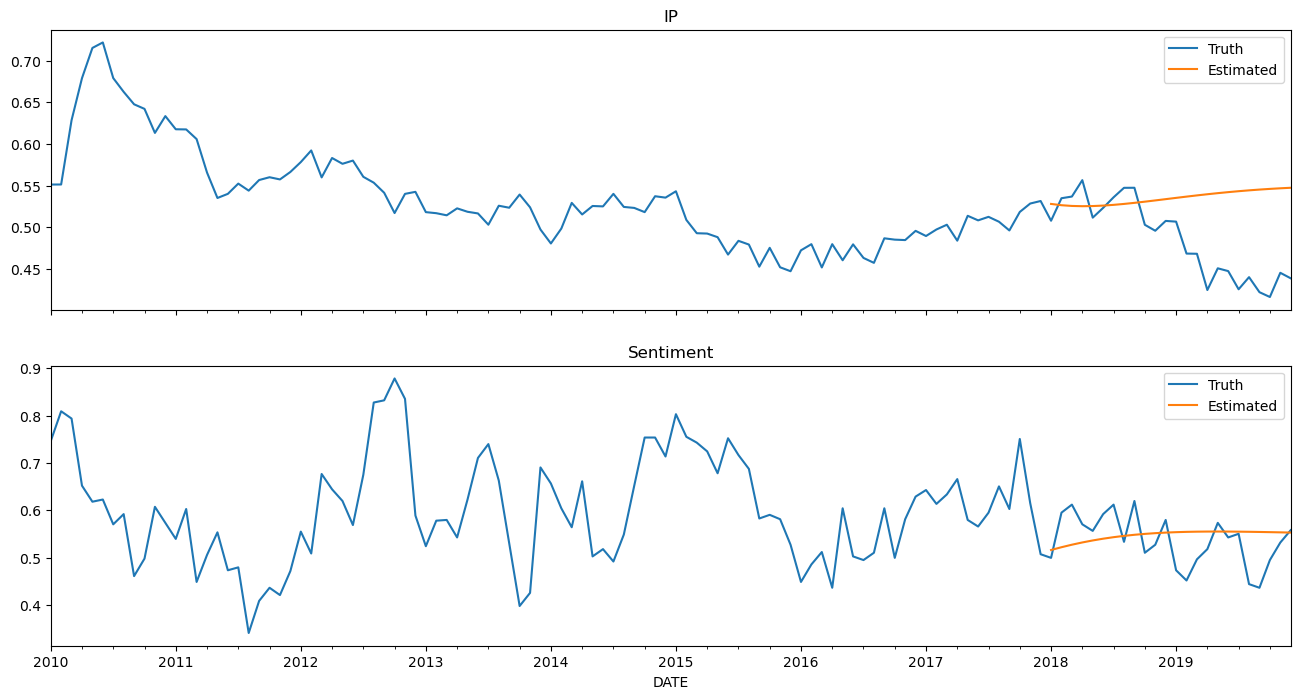

In [47]:
fig, axes = plt.subplots(figsize = [16, 8],
                         sharex = True,
                         nrows = 2)

df_stationary["2010": ].ip.plot(ax = axes[0], label = "Truth", title = "IP")
preds.ip.plot(label = "Estimated", ax = axes[0])
axes[0].legend()

df_stationary["2010": ].sentiment.plot(ax = axes[1], label = "Truth", title = "Sentiment")
preds.sentiment.plot(label = "Estimated", ax = axes[1])
axes[1].legend()

> Team, it was great seeing you tonight at `Py`Day! Thank you for your kind words 🙏 They mean a lot to me.